In [4]:
import json

DATA_FILE = "../data/isoflops_curves.json"
with open(DATA_FILE, "r") as f:
    data = json.load(f)

In [8]:
from rich import print
min_loss_per_compute = {}
for run in data:
    final_loss = run["final_loss"]
    compute_budget = run["compute_budget"]
    parameters = run["parameters"]
    if compute_budget not in min_loss_per_compute:
        min_loss_per_compute[compute_budget] = run
    else:
        if final_loss < min_loss_per_compute[compute_budget]["final_loss"]:
            min_loss_per_compute[compute_budget] = run
print(min_loss_per_compute)

{
    6e+18: {'parameters': 762093419, 'compute_budget': 6e+18, 'final_loss': 5.899930270214304},
    1e+19: {'parameters': 806647749, 'compute_budget': 1e+19, 'final_loss': 5.617943423092358},
    3e+19: {'parameters': 1536852354, 'compute_budget': 3e+19, 'final_loss': 5.107176953205009},
    6e+19: {'parameters': 1952041776, 'compute_budget': 6e+19, 'final_loss': 4.830586005050577},
    1e+20: {'parameters': 3253402960, 'compute_budget': 1e+20, 'final_loss': 4.6528929644335255},
    3e+20: {'parameters': 5903836027, 'compute_budget': 3e+20, 'final_loss': 4.311218819265305},
    6e+20: {'parameters': 6971055968, 'compute_budget': 6e+20, 'final_loss': 4.121240846441071},
    1e+21: {'parameters': 6859328563, 'compute_budget': 1e+21, 'final_loss': 4.002834749948777},
    3e+21: {'parameters': 12148905329, 'compute_budget': 3e+21, 'final_loss': 3.773187514504335}
}

Fitted parameters: [25.79296982  0.40381139]

Predicted parameters for compute budget 1.00e+23 FLOPs: 5.00e+10 parameters

Predicted parameters for compute budget 1.00e+24 FLOPs: 1.27e+11 parameters

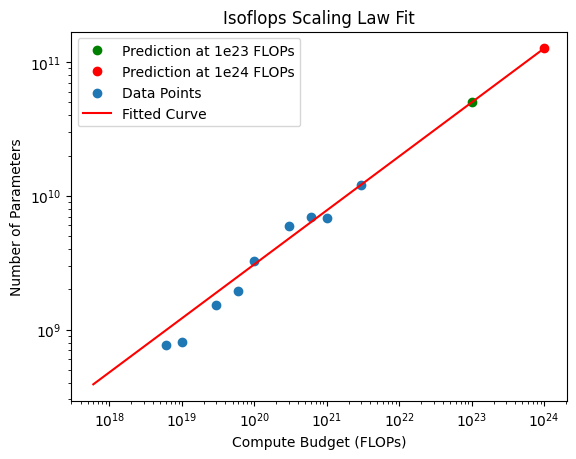

In [ ]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
compute_budgets = []
parameters = []
for compute_budget, run in min_loss_per_compute.items():
    compute_budgets.append(compute_budget)
    parameters.append(run["parameters"])

def model(x, a, b):
    return a * x ** b
params, covariance = curve_fit(model, compute_budgets, parameters)
print("Fitted parameters:", params)

x_fit = np.linspace(min(compute_budgets) / 10, 10.**24, 100)
y_fit = model(x_fit, *params)
pred_x = 10.**23
pred_y = model(pred_x, *params)
print(f"Predicted parameters for compute budget {pred_x:.2e} FLOPs: {pred_y:.2e} parameters")
plt.plot(pred_x, pred_y, 'go', label="Prediction at 1e23 FLOPs")

pred_x = 10.**24
pred_y = model(pred_x, *params)
print(f"Predicted parameters for compute budget {pred_x:.2e} FLOPs: {pred_y:.2e} parameters")
plt.plot(pred_x, pred_y, 'ro', label="Prediction at 1e24 FLOPs")

plt.scatter(compute_budgets, parameters, label="Data Points")
plt.plot(x_fit, y_fit, color='red', label="Fitted Curve")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Compute Budget (FLOPs)")
plt.ylabel("Number of Parameters")
plt.title("Isoflops Scaling Law Fit")
plt.legend()
plt.show()

Fitted parameters for data sizes: [0.00633759 0.5967707 ]

Predicted data size for compute budget 1.00e+23 FLOPs: 3.37e+11 tokens

Predicted data size for compute budget 1.00e+24 FLOPs: 1.33e+12 tokens

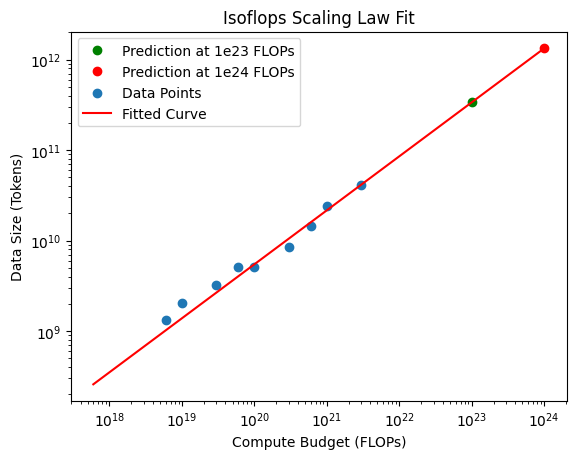

In [28]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
compute_budgets = []
parameters = []
data_sizes = []
for compute_budget, run in min_loss_per_compute.items():
    compute_budgets.append(compute_budget)
    parameters.append(run["parameters"])
    d = run["compute_budget"] / (6 * run["parameters"])
    data_sizes.append(d)

def model_data(x, a, b):
    return a * x ** b
params_data, covariance_data = curve_fit(model_data, compute_budgets, data_sizes)
print("Fitted parameters for data sizes:", params_data)

x_fit = np.linspace(min(compute_budgets) / 10, 10.**24, 100)
y_fit = model_data(x_fit, *params_data)
pred_x = 10.**23
pred_y = model_data(pred_x, *params_data)
print(f"Predicted data size for compute budget {pred_x:.2e} FLOPs: {pred_y:.2e} tokens")
plt.plot(pred_x, pred_y, 'go', label="Prediction at 1e23 FLOPs")

pred_x = 10.**24
pred_y = model_data(pred_x, *params_data)
print(f"Predicted data size for compute budget {pred_x:.2e} FLOPs: {pred_y:.2e} tokens")
plt.plot(pred_x, pred_y, 'ro', label="Prediction at 1e24 FLOPs")

plt.scatter(compute_budgets, data_sizes, label="Data Points")
plt.plot(x_fit, y_fit, color='red', label="Fitted Curve")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Compute Budget (FLOPs)")
plt.ylabel("Data Size (Tokens)")
plt.title("Isoflops Scaling Law Fit")
plt.legend()
plt.show()